In [1]:
#import libraries

import pandas as pd

In [2]:
#load the data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Explore the data
#df_train.shape
#df_test.shape

r, c =df_train.shape
print('Training data has {} rows and {} columns' .format(r,c))

r, c = df_test.shape
print('Testing data has {} rows and {} columns' .format(r,c))

Training data has 1460 rows and 81 columns
Testing data has 1459 rows and 80 columns


In [5]:
#figure out columns with most null values

Columns_with_null_val = df_train.isnull().sum().sort_values(ascending = False)

In [6]:
Columns_with_null_val.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [7]:
#feature Engineering
#Short-list some of the feature
imp_features = ['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']

In [8]:
df_train[imp_features].describe()

,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


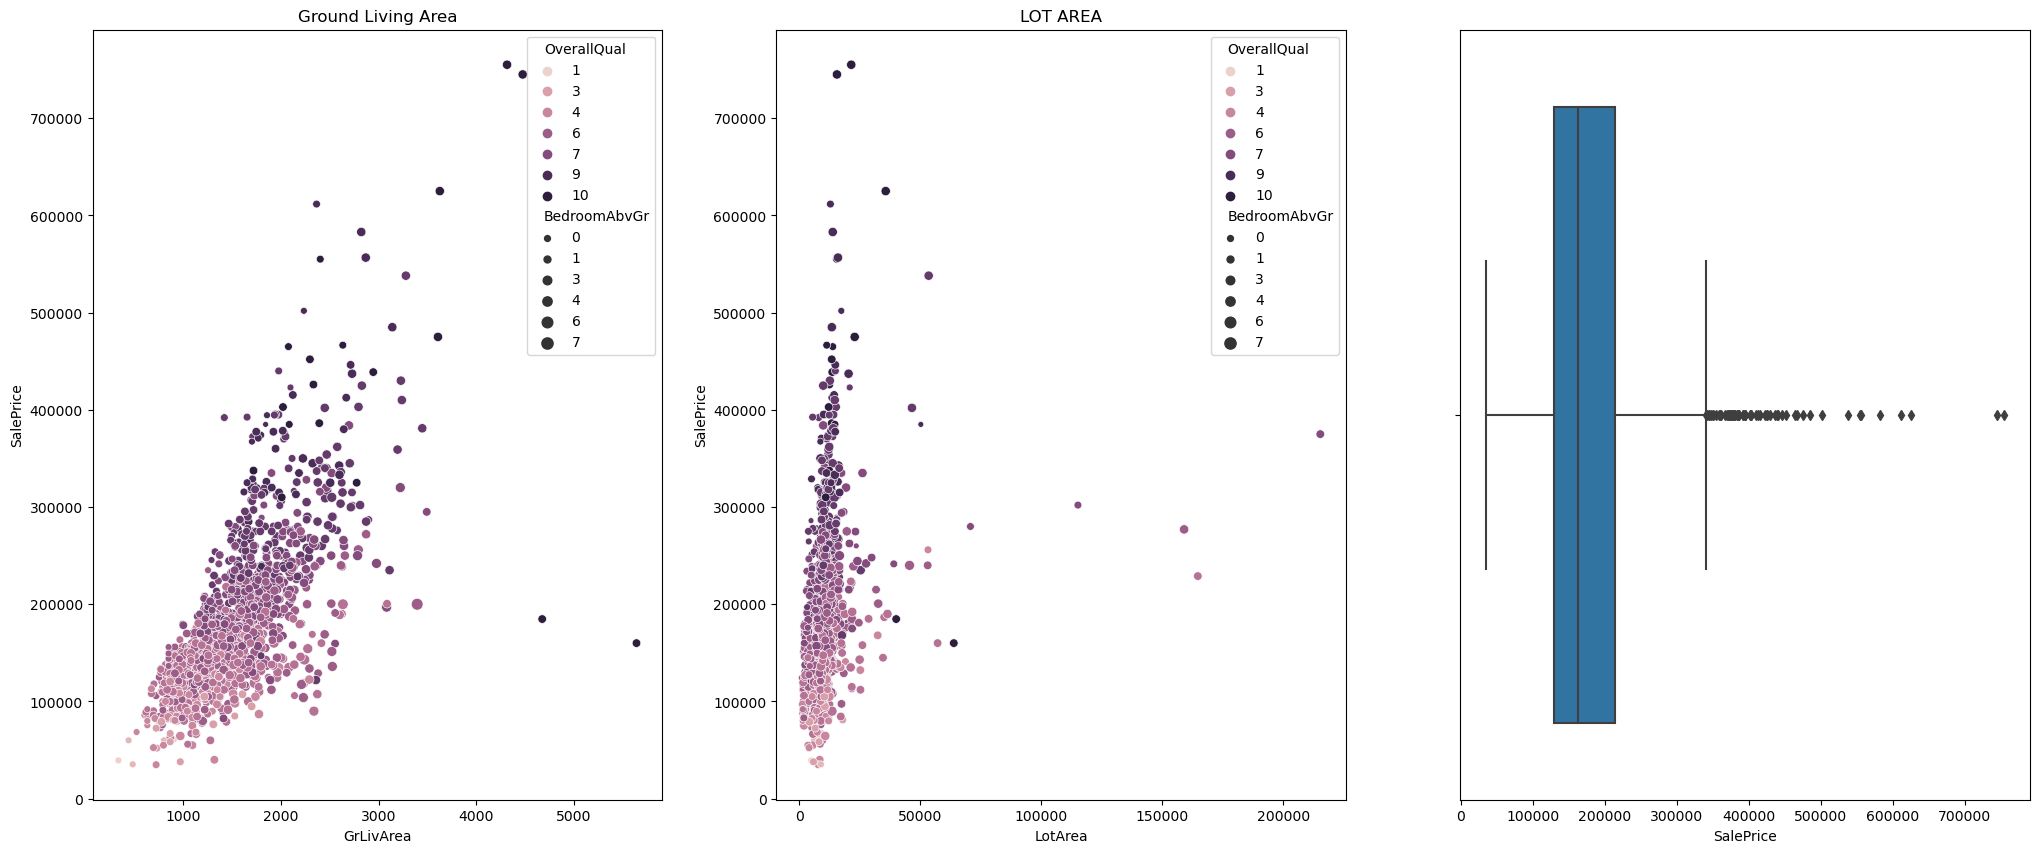

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up a figure with 3 subplots. The figure will be of size 25x10.
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

# Scatter plot for Ground Living Area vs Sale Price.
# The size of each point represents the number of bedrooms above ground.
# The color of each point is based on the Overall Quality of the house.
sns.scatterplot(x=df_train.GrLivArea, y=df_train.SalePrice, size=df_train.BedroomAbvGr, hue=df_train.OverallQual, ax=ax[0])
ax[0].set_title('Ground Living Area')  # Setting the title for the first subplot.

# Scatter plot for Lot Area vs Sale Price.
# Similar to the previous scatter plot, size represents number of bedrooms and color represents overall quality.
sns.scatterplot(x=df_train.LotArea, y=df_train.SalePrice, size=df_train.BedroomAbvGr, hue=df_train.OverallQual, ax=ax[1])
ax[1].set_title('LOT AREA')  # Setting the title for the second subplot.

# Box plot for Sale Price to visually see its distribution and identify potential outliers.
sns.boxplot(x=df_train.SalePrice);

# Displaying the plots.
plt.show()


> * Houses with Ground Living Area more than 4000 are outliers
> * Houses with Lot Area more than 6000 are outliers
> * Sales Price more than 45000 are putliers

C:\Users\shaik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


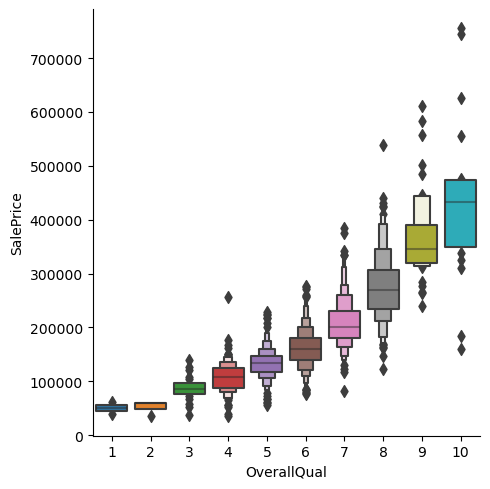

In [10]:
# Create a "boxen" plot (enhanced box plot) using Seaborn's catplot function.
# The plot shows the distribution of 'SalePrice' across different values of 'OverallQual'.
# The "boxen" plot provides a detailed visualization of the distribution, showing more quantiles than a standard box plot.
sns.catplot(data=df_train, y='SalePrice', x='OverallQual', kind='boxen');

# Display the plot.
plt.show()

In [11]:
# Identify the indices of rows in df_train where the 'SalePrice' is greater than the 99.5th percentile of all 'SalePrice' values.
rows_drop = df_train[df_train['SalePrice'] > df_train['SalePrice'].quantile(0.995)].index

# Drop the identified rows from the df_train DataFrame using their indices.
df_train.drop(rows_drop, inplace=True)


In [12]:
df_train.shape

(1452, 81)

In [13]:
# Identify the indices of rows in df_train where the 'GrLivArea' (Above ground living area square feet) is greater than 4000.
rows_drop = df_train[df_train['GrLivArea'] > 4000].index

# Drop these identified rows from the df_train DataFrame using their indices.
df_train.drop(rows_drop, inplace=True)


In [14]:
df_train.shape

(1450, 81)

In [15]:
# Identify the indices of rows in df_train where the 'LotArea' (size of the lot in square feet) is greater than 100,000.
rows_drop = df_train[df_train['LotArea'] > 100000].index

# Drop these identified rows from the df_train DataFrame using their indices.
df_train.drop(rows_drop, inplace=True)


In [16]:
df_train.shape

(1446, 81)

In [17]:
# Prepare the data for modeling:

# For the training dataset:
# Drop the 'Id' and 'SalePrice' columns from df_train to create the feature matrix (X_train).
# The 'axis=1' argument indicates that columns are being dropped.
X_train = df_train.drop(['Id', 'SalePrice'], axis=1)

# Set the target variable (y_train) to be the 'SalePrice' column from df_train.
y_train = df_train.SalePrice

# For the testing dataset:
# Drop the 'Id' column from df_test to create the feature matrix (X_test).
# Again, 'axis=1' indicates that columns are being dropped.
X_test = df_test.drop(['Id'], axis=1)


In [18]:
# Select Categorical Column
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
#print(categorical_cols)

# select nemerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
#print(numerical_cols)

In [19]:
# Import necessary modules for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for Numerical Data:

# Initialize a SimpleImputer transformer to fill missing values in numerical columns.
# 'strategy="constant"' means it will fill missing values with a constant value (default is 0 for numerical columns).
num_transformer = SimpleImputer(strategy='constant')

# Preprocessing for Categorical Data:

# Create a pipeline for preprocessing categorical data.
# 1. It first imputes missing values using the most frequent value in the column.
# 2. Then, it applies one-hot encoding to convert categorical variables into a format suitable for modeling. 
# The 'handle_unknown="ignore"' argument ensures that during transformation of the validation or test data,
# if there are classes that weren't in the training data, they will be ignored (instead of raising an error).
cate_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle Preprocessing for Numerical and Categorical Data:

# Use a ColumnTransformer to apply the specific transformers to the appropriate columns in the dataframe.
# The first tuple applies 'num_transformer' to the 'numerical_cols'.
# The second tuple applies 'cate_transformer' to the 'categorical_cols'.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cate_transformer, categorical_cols)
    ]
)



In [ ]:
# Importing necessary modules for modeling.
from sklearn.ensemble import GradientBoostingRegressor

# Modelling:

# Initialize the Gradient Boosting Regressor model.
# Here are the parameters being set:
# - n_estimators: The number of boosting stages to be run.
# - loss: The loss function to be optimized. 'squared_error' is used for regression.
# - subsample: Fraction of samples used for fitting the individual base learners.
# - learning_rate: Rate at which the model adjusts based on errors from earlier stages.
# - random_state: Seed for the random number generator (to ensure reproducibility).
model_GBR = GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample=0.35, learning_rate=0.05, random_state=1)

# Create a pipeline that first applies the preprocessor (data preprocessing steps) and then fits the model.
GBR_Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', model_GBR)
])

# Fit the pipeline to the training data. 
# This means the data will first go through preprocessing and then be used to train the Gradient Boosting Regressor model.
GBR_Pipeline.fit(X_train, y_train)

# Use the trained pipeline to predict on the test set.
# Note: This means the test data will first go through the same preprocessing before making predictions.
preds_GBR = GBR_Pipeline.predict(X_test)


In [ ]:
pridicted_price = pd.DataFrame({'Id' : df_test.Id, 'SalePrice': preds_GBR})

In [ ]:
pridicted_price.head(20)